# Import Libararies and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# create path
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 6/Citibike Project'

In [4]:
data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikes_new.csv'), index_col = False)

In [5]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


In [6]:
data = data.drop(columns = ['Unnamed: 0'])

In [7]:
data.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


# Data Cleaning and Testing

In [8]:
data.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,gender,age,trip_minutes
count,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,17615.280109,14.146027,443.310683,40.734171,-73.991106,442.519639,40.733861,-73.991348,838.877624,1.073574,37.716053,13.480821
std,1675.220866,4.860599,356.565315,0.019911,0.012552,355.687559,0.019885,0.012569,573.675762,0.589522,10.192774,9.534390
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,0.000000,16.667826,1.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1.000000,30.687462,6.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1.000000,35.706917,11.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1.000000,43.705035,18.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,2.000000,96.693329,44.000000


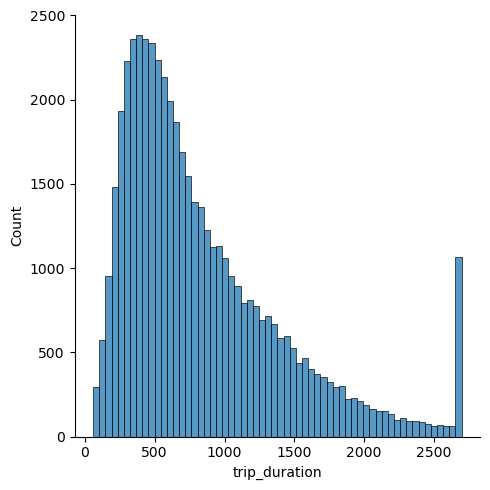

In [9]:
sns.displot(data['trip_duration'], bins=60) # Shows extreme values

In [11]:
# Convert the 'date_column' to datetime format
data['start_time'] = pd.to_datetime(data['start_time'])

# Display the DataFrame with parsed dates
print(data)

      trip_id  bike_id weekday  start_hour          start_time  \
0      LnQzQk    16013     Mon          18 2013-09-09 18:18:55   
1      IL9boN    15230     Thu          18 2013-09-12 18:38:53   
2      46clGB    17942     Wed          19 2013-09-18 19:44:04   
3      v7vdFt    19683     Sat          11 2013-09-28 11:54:37   
4      VGBsb5    18024     Sat          18 2013-09-07 18:08:22   
...       ...      ...     ...         ...                 ...   
49972  Fb2bmC    17988     Sat          18 2013-09-21 18:39:20   
49973  XGB7JU    18458     Sat          17 2013-09-14 17:32:26   
49974  vFs2HS    15054     Sat          18 2013-09-07 18:08:21   
49975  xxacSt    16763     Sat          13 2013-09-07 13:25:35   
49976  4ZmicF    16794     Mon          21 2013-09-23 21:54:36   

       start_station_id       start_station_name  start_station_latitude  \
0                   523          W 38 St & 8 Ave               40.754666   
1                   257  Lispenard St & Broadway       

In [12]:
file_path = os.path.join(path, '02 Data','Prepared Data', 'citibikes_new.csv')

In [13]:
data2 = pd.read_csv(file_path, parse_dates=['start_time'])

In [14]:
data2.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


In [15]:
data2 = data2.drop(columns = ['Unnamed: 0'])

In [21]:
# Extract date and time into separate columns
data2['date_column'] = data2['start_time'].dt.date
data2['time_column'] = data2['start_time'].dt.hour

In [22]:
data2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes,date_column,time_column
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16,2013-09-09,18
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9,2013-09-12,18
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6,2013-09-18,19
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9,2013-09-28,11
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38,2013-09-07,18


In [33]:
# Group by hour and day, and count the occurrences
hour_counts = data2.groupby([data2['time_column'], data2['date_column']]).size().reset_index(name='count')

In [34]:
hour_counts

,time_column,date_column,count
0,0,2013-09-01,21
1,0,2013-09-02,26
2,0,2013-09-03,7
3,0,2013-09-04,11
4,0,2013-09-05,19
...,...,...,...
708,23,2013-09-26,42
709,23,2013-09-27,47
710,23,2013-09-28,55
711,23,2013-09-29,22


In [39]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('time_column')['count'].mean(numeric_only=False).reset_index()

In [40]:
avg_rides_per_hour

,time_column,count
0,0,17.400000
1,1,11.000000
2,2,6.466667
3,3,4.615385
4,4,3.296296
5,5,6.933333
6,6,30.366667
7,7,67.900000
8,8,109.433333
9,9,93.700000


In [42]:
day_counts = data2.groupby('weekday')['start_time'].count().reset_index()

In [43]:
day_counts

,weekday,start_time
0,Fri,7308
1,Mon,7712
2,Sat,6507
3,Sun,7315
4,Thu,6849
5,Tue,7062
6,Wed,7224


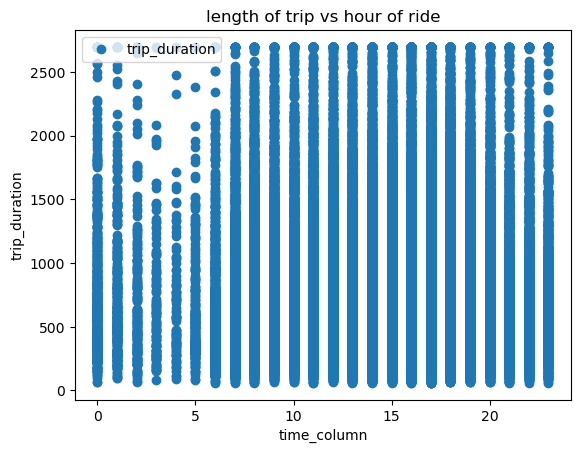

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data2.plot(x = 'time_column', y='trip_duration',style='o')
plt.title('length of trip vs hour of ride')  
plt.xlabel('time_column')  
plt.ylabel('trip_duration')  
plt.show()

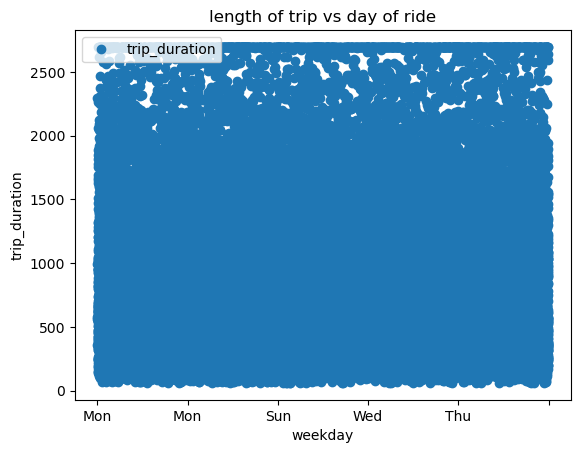

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data2.plot(x = 'weekday', y='trip_duration',style='o')
plt.title('length of trip vs day of ride')  
plt.xlabel('weekday')  
plt.ylabel('trip_duration')  
plt.show()

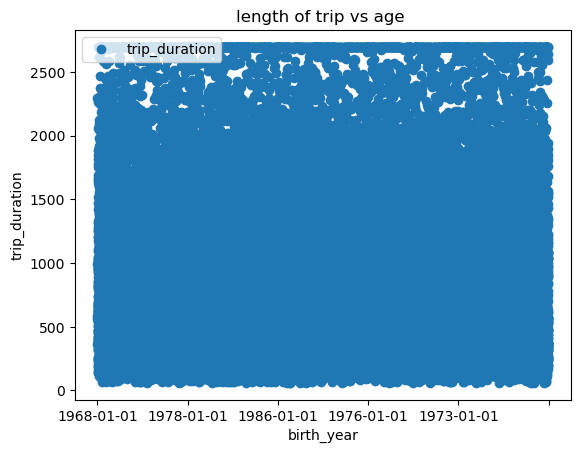

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data2.plot(x = 'birth_year', y='trip_duration',style='o') 
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

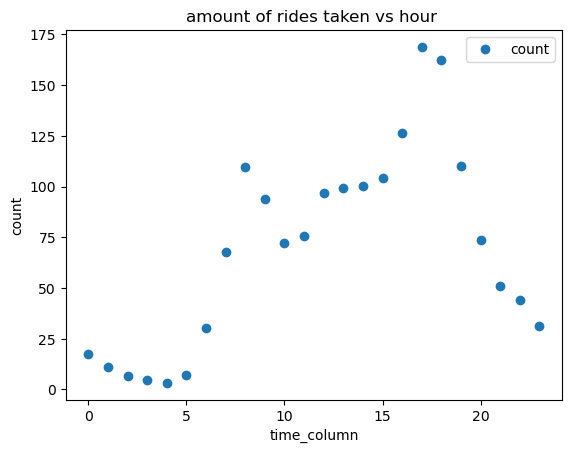

In [47]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'time_column', y='count',style='o') 
plt.title('amount of rides taken vs hour ')  
plt.xlabel('time_column')  
plt.ylabel('count')  
plt.show()

In [48]:
ride_counts = pd.get_dummies(data2, columns=['weekday', 'time_column'], drop_first=True)

In [49]:
ride_counts

,trip_id,bike_id,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,time_column_14,time_column_15,time_column_16,time_column_17,time_column_18,time_column_19,time_column_20,time_column_21,time_column_22,time_column_23
0,LnQzQk,16013,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,0,0,0,0,1,0,0,0,0,0
1,IL9boN,15230,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,0,0,0,0,1,0,0,0,0,0
2,46clGB,17942,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,0,0,0,0,0,1,0,0,0,0
3,v7vdFt,19683,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,0,0,0,0,0,0,0,0,0,0
4,VGBsb5,18024,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,Fb2bmC,17988,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,...,0,0,0,0,1,0,0,0,0,0
49973,XGB7JU,18458,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,...,0,0,0,1,0,0,0,0,0,0
49974,vFs2HS,15054,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,...,0,0,0,0,1,0,0,0,0,0
49975,xxacSt,16763,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('time_column').count().reset_index()

In [52]:
# amount of rides taken on each hour of each day
hour_counts_1 = data2.groupby('time_column')['date_column'].count()

In [53]:
hour_counts_1

time_column
0      522
1      330
2      194
3      120
4       89
5      208
6      911
7     2037
8     3283
9     2811
10    2166
11    2272
12    2899
13    2978
14    3002
15    3129
16    3790
17    5067
18    4869
19    3302
20    2207
21    1536
22    1323
23     932
Name: date_column, dtype: int64

In [54]:
hourly_aggregated = data2.groupby('time_column').agg({
    'date_column': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [55]:
hourly_aggregated

,time_column,date_column,trip_duration
0,0,522,818.139847
1,1,330,817.136364
2,2,194,760.989691
3,3,120,745.958333
4,4,89,735.662921
5,5,208,642.836538
6,6,911,659.232711
7,7,2037,739.270987
8,8,3283,777.958879
9,9,2811,767.065813


In [56]:
hourly_aggregated.rename(columns={'date_column': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [57]:
hourly_aggregated

,time_column,ride_count,avg_trip_duration
0,0,522,818.139847
1,1,330,817.136364
2,2,194,760.989691
3,3,120,745.958333
4,4,89,735.662921
5,5,208,642.836538
6,6,911,659.232711
7,7,2037,739.270987
8,8,3283,777.958879
9,9,2811,767.065813


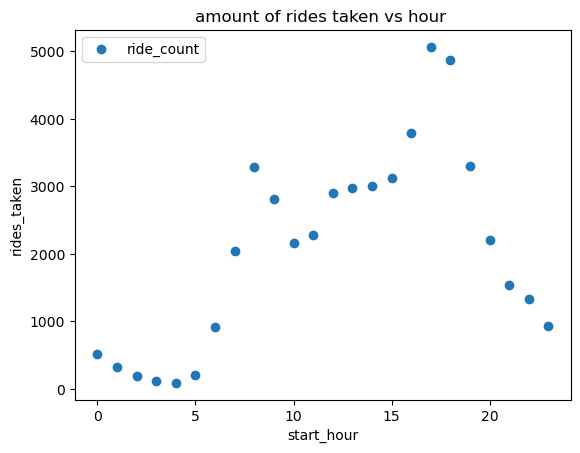

In [60]:
hourly_aggregated.plot(x = 'time_column', y='ride_count',style='o') 
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

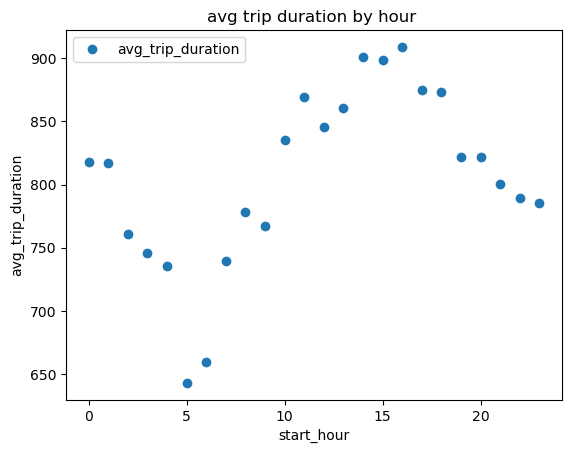

In [61]:
hourly_aggregated.plot(x = 'time_column', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

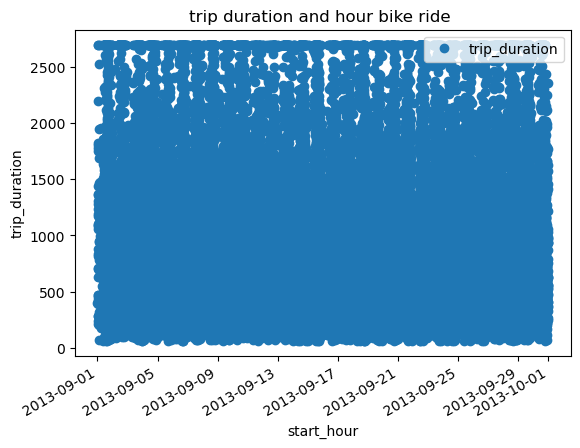

In [62]:
data2.plot(x = 'start_time', y='trip_duration',style='o') 
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

I noticed that the scatterplots for both the amount of rides taken vs. hour and avg trip duration by hour are nearly identical, meaning that during the more popular times for bike rentals the longer the rides tend to be.

In [63]:
#using iqr method to look for outliers
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [64]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [65]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [66]:
outliers

,time_column,ride_count,avg_trip_duration


In [67]:
#using iqr method to look for outliers
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [68]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [69]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [70]:
outliers_1

,time_column,ride_count,avg_trip_duration


In [71]:
#finding outliers in the main dateset
q1=data2['trip_duration'].quantile(0.25)#first Quartile
q3=data2['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [72]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [74]:
outliers_2 = data2[(data2['trip_duration'] < lower_bound) | (data2['trip_duration'] > upper_bound)]

In [75]:
outliers_2

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes,date_column,time_column
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38,2013-09-07,18
52,pTMLPi,15336,Sat,18,2013-09-14 18:40:53,384,Fulton St & Waverly Ave,40.683178,-73.965964,2013-09-14 19:29:13,...,-73.965251,2697,Non-Subscriber,1978-01-01,0,35.704439,long trip,44,2013-09-14,18
63,Wj4Vjl,20352,Wed,17,2013-09-11 17:11:27,469,Broadway & W 53 St,40.763441,-73.982681,2013-09-11 17:49:09,...,-73.967510,2262,Subscriber,1979-01-01,2,34.696719,long trip,37,2013-09-11,17
120,QCRJ3f,16918,Mon,18,2013-09-30 18:24:17,160,E 37 St & Lexington Ave,40.748238,-73.978311,2013-09-30 19:28:04,...,-73.984267,2697,Non-Subscriber,1978-01-01,0,35.748213,long trip,44,2013-09-30,18
143,NltTQm,17737,Mon,15,2013-09-09 15:51:13,217,Old Fulton St,40.702772,-73.993836,2013-09-09 16:58:15,...,-73.965251,2697,Non-Subscriber,1978-01-01,0,35.690426,long trip,44,2013-09-09,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49870,u1yEkP,18054,Mon,16,2013-09-09 16:13:08,493,W 45 St & 6 Ave,40.756800,-73.982912,2013-09-09 17:13:59,...,-73.971212,2697,Subscriber,1968-01-01,1,45.692042,long trip,44,2013-09-09,16
49926,NR5zjV,17769,Mon,17,2013-09-23 17:13:04,534,Water - Whitehall Plaza,40.702551,-74.012723,2013-09-23 17:56:16,...,-73.978474,2592,Non-Subscriber,1978-01-01,0,35.728913,long trip,43,2013-09-23,17
49940,ju0sOp,18471,Fri,15,2013-09-06 15:55:58,147,Greenwich St & Warren St,40.715422,-74.011220,2013-09-06 16:40:00,...,-73.990093,2642,Non-Subscriber,1978-01-01,0,35.682222,long trip,44,2013-09-06,15
49972,Fb2bmC,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,...,-73.998842,2697,Non-Subscriber,1978-01-01,0,35.723601,long trip,44,2013-09-21,18


In [76]:
outliers_2.shape

(2060, 23)

In [77]:
data2.shape

(49977, 23)

In [78]:
#removing outliers
filtered_data = data2[(data2['trip_duration'] >= lower_bound) & (data2['trip_duration'] <= upper_bound)]

In [79]:
filtered_data.shape

(47917, 23)

Testing more relationships between variables.

In [81]:
day_counts = data2.groupby('weekday')['start_time'].count().reset_index()

In [82]:
day_counts

,weekday,start_time
0,Fri,7308
1,Mon,7712
2,Sat,6507
3,Sun,7315
4,Thu,6849
5,Tue,7062
6,Wed,7224


In [83]:
daily_aggregated = data2.groupby('weekday').agg({
    'start_time': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [84]:
daily_aggregated

,weekday,start_time,trip_duration
0,Fri,7308,808.252463
1,Mon,7712,819.061981
2,Sat,6507,931.101122
3,Sun,7315,936.217498
4,Thu,6849,787.129946
5,Tue,7062,790.929199
6,Wed,7224,805.311600


In [85]:
daily_aggregated.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

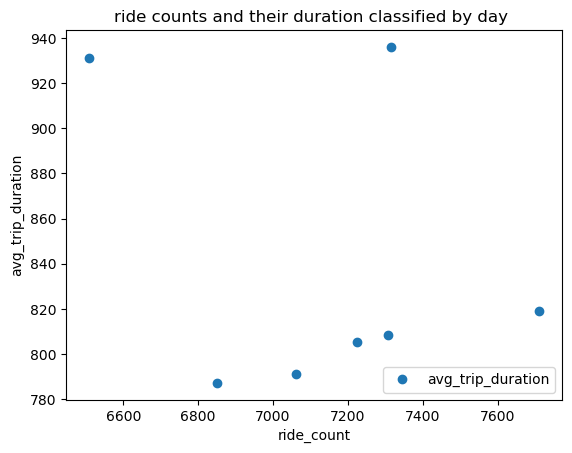

In [86]:
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and their duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

# Regression Analysis

In [87]:
# reshape ride count and avg trip duration un to NumPy arrays
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [89]:
X

array([[ 522],
       [ 330],
       [ 194],
       [ 120],
       [  89],
       [ 208],
       [ 911],
       [2037],
       [3283],
       [2811],
       [2166],
       [2272],
       [2899],
       [2978],
       [3002],
       [3129],
       [3790],
       [5067],
       [4869],
       [3302],
       [2207],
       [1536],
       [1323],
       [ 932]])

In [91]:
y

array([[818.13984674],
       [817.13636364],
       [760.98969072],
       [745.95833333],
       [735.66292135],
       [642.83653846],
       [659.23271131],
       [739.27098675],
       [777.95887907],
       [767.06581288],
       [835.46952909],
       [869.1852993 ],
       [845.24974129],
       [860.67360645],
       [900.86409061],
       [898.64653244],
       [909.18707124],
       [874.56364713],
       [873.08112549],
       [821.4954573 ],
       [821.52333484],
       [800.77539062],
       [789.6984127 ],
       [785.37339056]])

In [92]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
# Create a regression object.
regression = LinearRegression() 

In [94]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [95]:
LinearRegression()

LinearRegression()

In [96]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

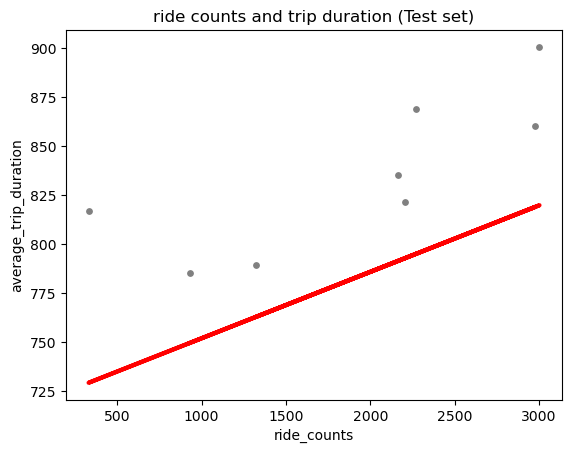

In [97]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

The regression line has a positive slope, but the data points are not close to it.

In [98]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [99]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03391579]]
Mean squared error:  3267.1096721066942
R2 score:  -1.3374416161630647


In [100]:
# Create a dataframe comparing the actual and predicted values of y.
data3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data3.head(30)

,Actual,Predicted
0,869.185299,795.241951
1,835.469529,791.646877
2,789.698413,763.055865
3,900.864091,820.000478
4,821.523335,793.037425
5,817.136364,729.377485
6,860.673606,819.186499
7,785.373391,749.794791


This model did not perform well on the test set. There is a significate difference between the actual and predicted values. The MSE score is high, which is an indicator of a weak relationship. 

In [102]:
# repeat IQR method with data that removes the outliers
hourly_aggregated_filtered = outliers_2.groupby('time_column').agg({
    'start_time': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [103]:
hourly_aggregated_filtered

,time_column,start_time,trip_duration
0,0,19,2536.315789
1,1,14,2596.500000
2,2,7,2522.857143
3,3,3,2693.333333
4,4,4,2548.750000
5,5,2,2537.500000
6,6,18,2597.388889
7,7,49,2482.693878
8,8,83,2477.771084
9,9,100,2532.340000


In [105]:
hourly_aggregated_filtered.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

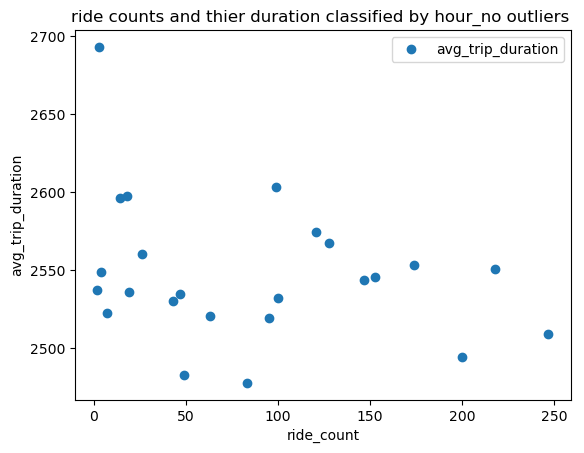

In [106]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [107]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [108]:
# Split data into a training set and a test set.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [109]:
# Create a regression object.
regression = LinearRegression() 

In [110]:
# Fit the regression object onto the training set.
regression.fit(X_1_train, y_1_train)

LinearRegression()

In [111]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

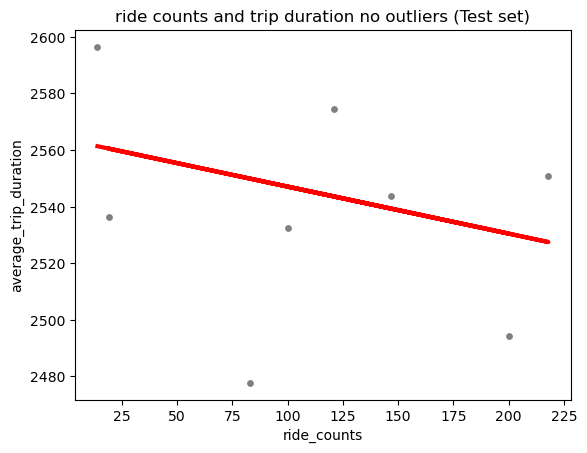

In [112]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

There is a negative regression line.

In [113]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [114]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.16607773]]
Mean squared error:  1257.0783664563007
R2 score:  0.043091347965896754


In [115]:
# Create a dataframe comparing the actual and predicted values of y.
data4 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data4.head(30)

,Actual,Predicted
0,2477.771084,2549.912963
1,2550.724771,2527.492470
2,2536.315789,2560.541938
3,2494.330000,2530.481869
4,2574.363636,2543.602009
5,2532.340000,2547.089642
6,2543.843537,2539.283989
7,2596.500000,2561.372326


This model is a little bit closer, but it is still off by a few seconds.

In [116]:
hourly_aggregated_filtered.head()

,time_column,ride_count,avg_trip_duration
0,0,19,2536.315789
1,1,14,2596.500000
2,2,7,2522.857143
3,3,3,2693.333333
4,4,4,2548.750000


In [117]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [118]:
hourly_aggregated_filtered

,time_column,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,19,2536.315789,42.271930
1,1,14,2596.500000,43.275000
2,2,7,2522.857143,42.047619
3,3,3,2693.333333,44.888889
4,4,4,2548.750000,42.479167
5,5,2,2537.500000,42.291667
6,6,18,2597.388889,43.289815
7,7,49,2482.693878,41.378231
8,8,83,2477.771084,41.296185
9,9,100,2532.340000,42.205667


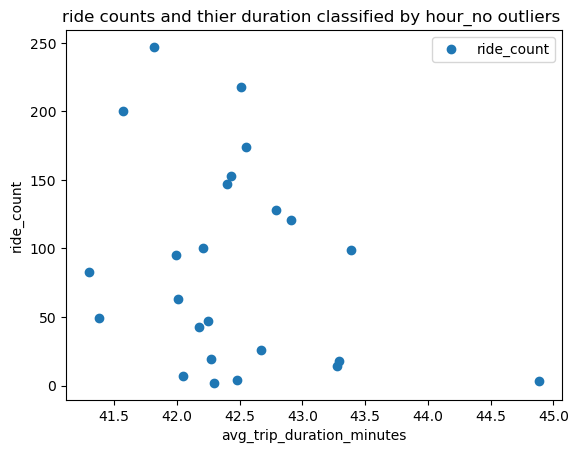

In [119]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') 
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [120]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [121]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

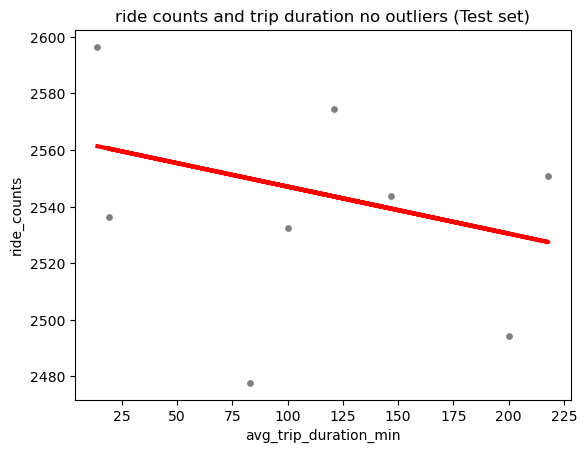

In [122]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [123]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [124]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.16607773]]
Mean squared error:  1257.0783664563007
R2 score:  0.043091347965896754


In [125]:
ride_counts.head()

,trip_id,bike_id,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,time_column_14,time_column_15,time_column_16,time_column_17,time_column_18,time_column_19,time_column_20,time_column_21,time_column_22,time_column_23
0,LnQzQk,16013,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,0,0,0,0,1,0,0,0,0,0
1,IL9boN,15230,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,0,0,0,0,1,0,0,0,0,0
2,46clGB,17942,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,0,0,0,0,0,1,0,0,0,0
3,v7vdFt,19683,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,0,0,0,0,0,0,0,0,0,0
4,VGBsb5,18024,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,0,0,0,0,1,0,0,0,0,0


In [127]:
X=hourly_aggregated_filtered[['time_column','avg_trip_duration']]

In [128]:
import statsmodels.api as sm

In [129]:
X = sm.add_constant(X)

In [130]:
y = hourly_aggregated_filtered['ride_count']

In [131]:
model = sm.OLS(y, X).fit()

In [132]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.490
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0491
Time:                        16:14:23   Log-Likelihood:                -133.38
No. Observations:                  24   AIC:                             272.8
Df Residuals:                      21   BIC:                             276.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               642.7998    835.69

In [135]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['time_column']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']

In [136]:
X = sm.add_constant(X)

In [137]:
model_count = sm.OLS(y_count, X).fit()

In [138]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()

In [139]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     6.575
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0177
Time:                        16:15:45   Log-Likelihood:                -133.69
No. Observations:                  24   AIC:                             271.4
Df Residuals:                      22   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.1333  

In [141]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'time_column']]
X = sm.add_constant(X)

In [142]:
y = hourly_aggregated_filtered['ride_count']

In [143]:
model = sm.OLS(y, X).fit()

In [144]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.490
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0491
Time:                        16:16:32   Log-Likelihood:                -133.38
No. Observations:                  24   AIC:                             272.8
Df Residuals:                      21   BIC:                             276.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               642.7998    835.69

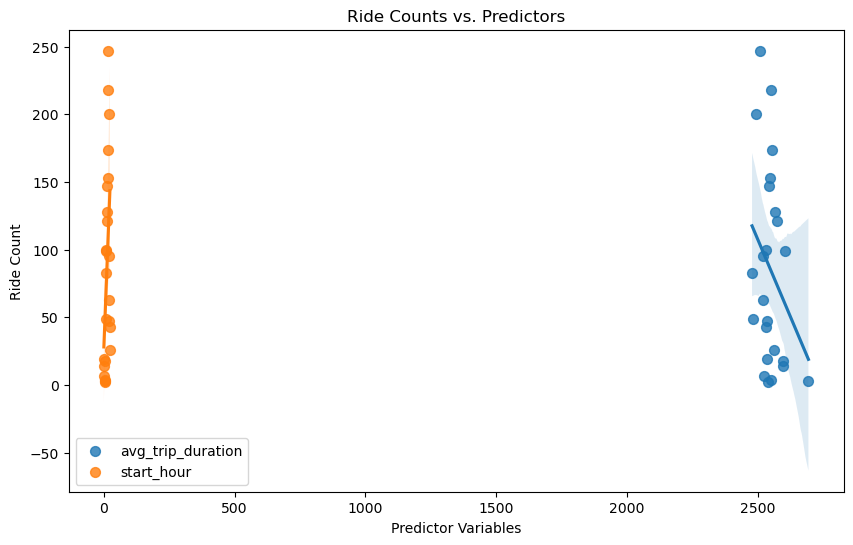

In [145]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='time_column', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [147]:
X = hourly_aggregated_filtered[['ride_count', 'time_column']]
X = sm.add_constant(X)

In [148]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [149]:
model = sm.OLS(y, X).fit()

In [150]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.391
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.271
Time:                        16:17:33   Log-Likelihood:                -123.52
No. Observations:                  24   AIC:                             253.0
Df Residuals:                      21   BIC:                             256.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2572.7267     18.047    142.560      

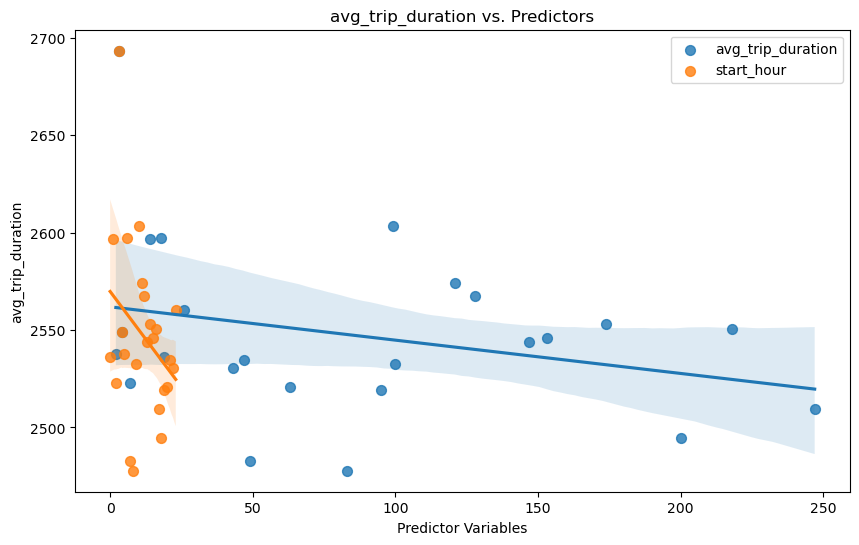

In [152]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='time_column', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [153]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['time_column'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

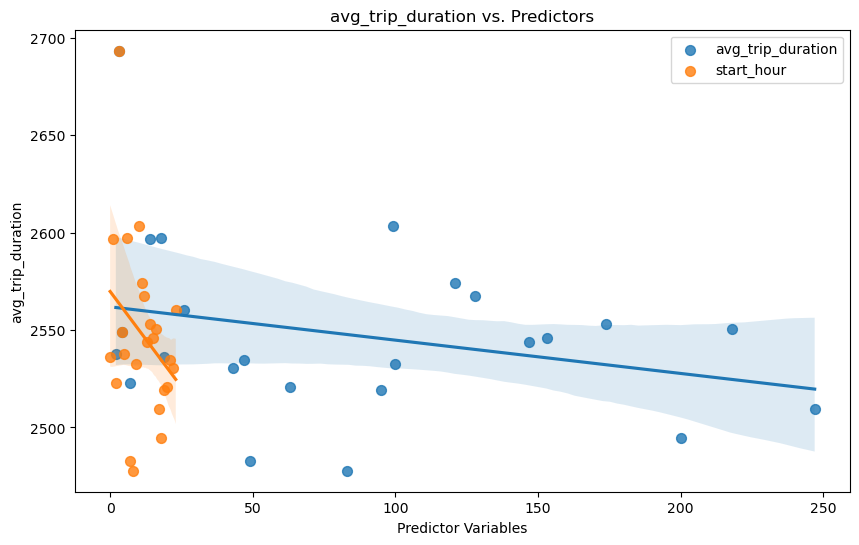

In [154]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [157]:
X = hourly_aggregated_filtered[['ride_count', 'time_column']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [159]:
# Create a regression object.

regression = LinearRegression() 

In [160]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [161]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [162]:
# Define the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'time_column']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [164]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [165]:
y

0     2536.315789
1     2596.500000
2     2522.857143
3     2693.333333
4     2548.750000
5     2537.500000
6     2597.388889
7     2482.693878
8     2477.771084
9     2532.340000
10    2603.292929
11    2574.363636
12    2567.421875
13    2543.843537
14    2553.160920
15    2545.797386
16    2550.724771
17    2509.206478
18    2494.330000
19    2519.400000
20    2520.746032
21    2534.680851
22    2530.418605
23    2560.192308
Name: avg_trip_duration, dtype: float64

In [166]:
X

,ride_count,time_column
0,19,0
1,14,1
2,7,2
3,3,3
4,4,4
5,2,5
6,18,6
7,49,7
8,83,8
9,100,9
